In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from beamline34IDC.simulation.facade import Implementors
from beamline34IDC.simulation.facade.focusing_optics_factory import focusing_optics_factory_method
from beamline34IDC.simulation.facade.focusing_optics_interface import Movement

from beamline34IDC.util.shadow.common import \
    plot_shadow_beam_spatial_distribution, get_shadow_beam_spatial_distribution,\
    load_shadow_beam, PreProcessorFiles
from beamline34IDC.util import clean_up
import matplotlib.pyplot as plt
import numpy as np
import scipy
from beamline34IDC.util.redirect_shadow_output import redirected_output

In [5]:
os.chdir('../../scripts/')

In [6]:
!pwd

/gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/scripts


 Call to RESET
 Exit from RESET
 Call to SETSOUR
 Exit from SETSOUR
 Call to IMREF
 Exit from IMREF
 Call to OPTAXIS
 Exit from OPTAXIS
 Call to MSETUP
 Exit from MSETUP
 Call to RESTART
 Exit from RESTART
 Call to MIRROR
 MIRROR1: Warning: Empty element (no mirr.xx file)
 Call to SCREEN
 Exit from SCREEN
 Call to IMAGE
 Exit from IMAGE
 Call to DEALLOC
 Exit from DEALLOC
 Call to RESET
 Exit from RESET
 Call to SETSOUR
 Exit from SETSOUR
 Call to IMREF
 Exit from IMREF
 Call to OPTAXIS
 Exit from OPTAXIS
 Call to MSETUP
 Exit from MSETUP
 Call to RESTART
 Exit from RESTART
 Call to MIRROR
 MIRROR1: Warning: Empty element (no mirr.xx file)
 Call to SCREEN
 Exit from SCREEN
 Call to SCREEN
 Exit from SCREEN
 Call to IMAGE
 Exit from IMAGE
 Call to DEALLOC
 Exit from DEALLOC
 Call to RESET
 Exit from RESET
 Call to SETSOUR
 Exit from SETSOUR
 Call to IMREF
 Exit from IMREF
 Call to OPTAXIS
 Exit from OPTAXIS
 Call to MSETUP
 Exit from MSETUP
 Call to RESTART
 Exit from RESTART
 Call to M

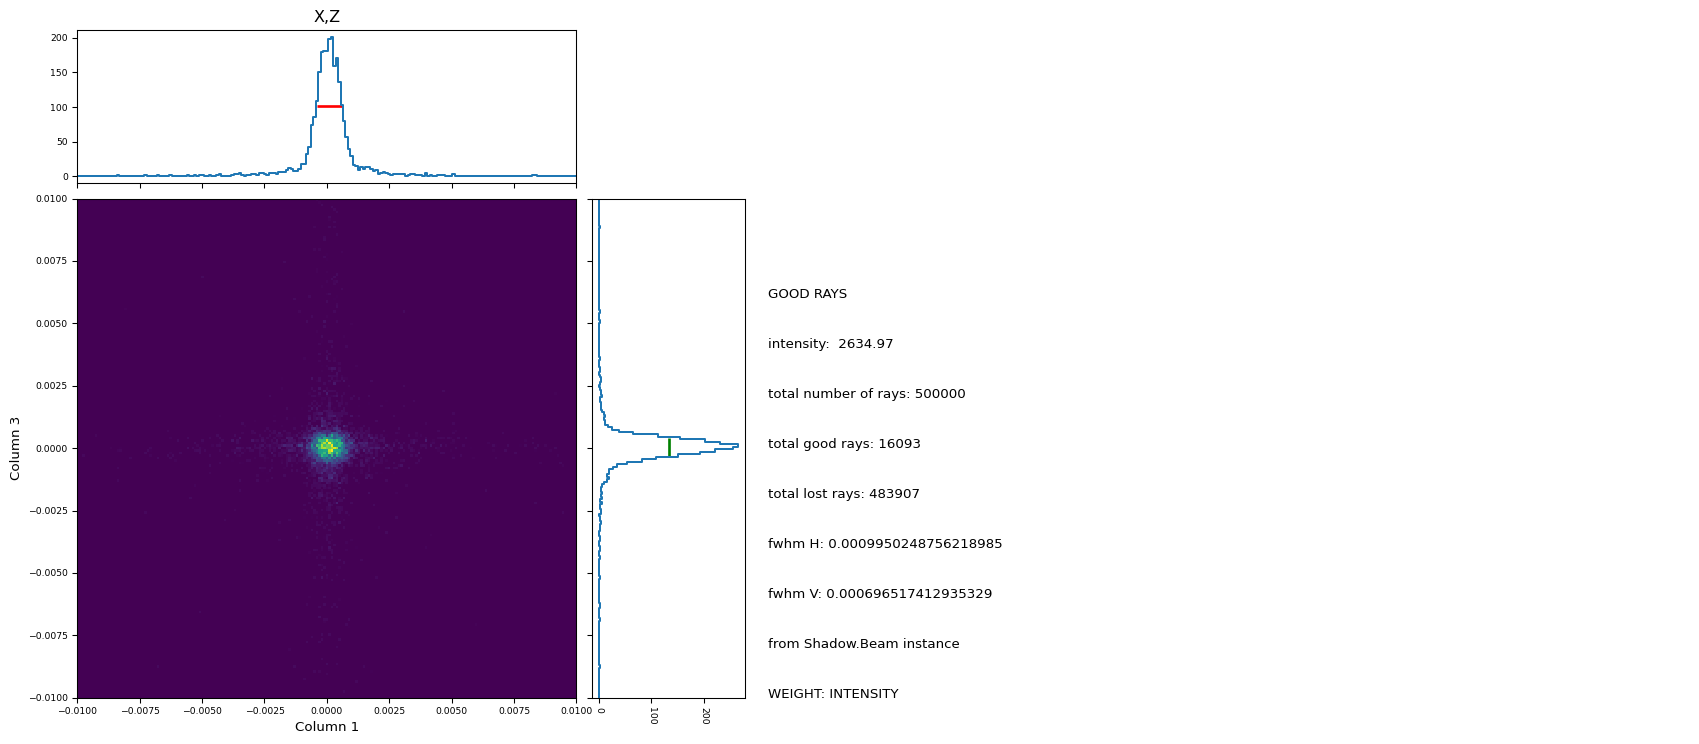

 Call to RESET
 Exit from RESET
 Call to SETSOUR
 Exit from SETSOUR
 Call to IMREF
 Exit from IMREF
 Call to OPTAXIS
 Exit from OPTAXIS
 Call to MSETUP
 Exit from MSETUP
 Call to RESTART
 Exit from RESTART
 Call to MIRROR
 MIRROR: Warning (before calculations): lack of perpendicularity in ray:          604
 MIRROR: Warning (before calculations): lack of perpendicularity in ray:         4993
 MIRROR: Warning (before calculations): lack of perpendicularity in ray:         6068
 MIRROR: Warning (before calculations): lack of perpendicularity in ray:         6781
 MIRROR: Warning (before calculations): lack of perpendicularity in ray:         9301
 MIRROR: Warning (before calculations): lack of perpendicularity in ray:        14312
 MIRROR: Warning (before calculations): lack of perpendicularity in ray:        14380
 MIRROR: Warning (before calculations): lack of perpendicularity in ray:        15188
 Exit from MIRROR
 Call to IMAGE
 Exit from IMAGE
 Call to DEALLOC
 Exit from DEALLOC
 Cal

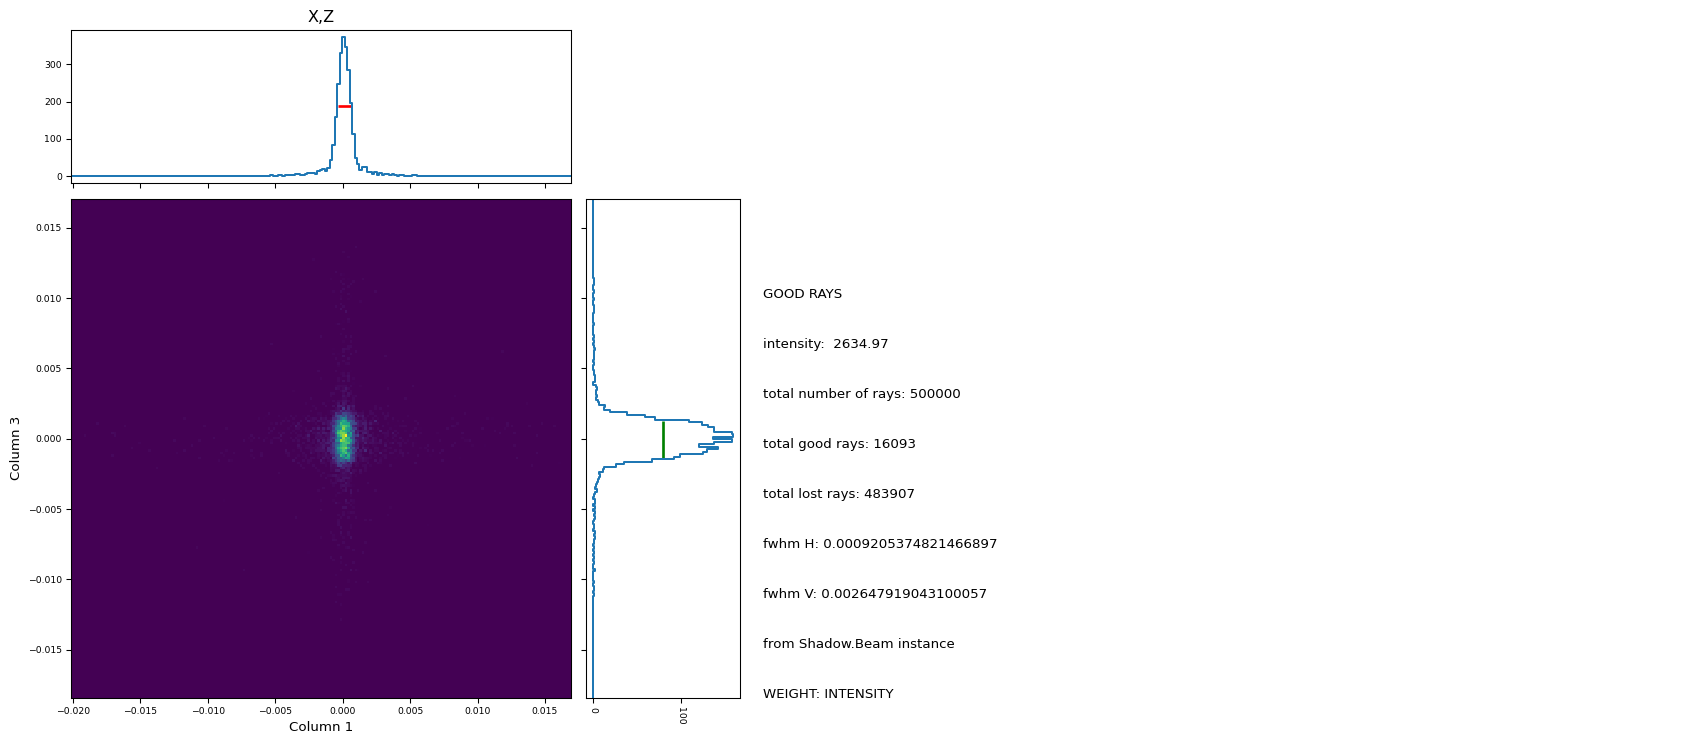

 Call to RESET
 Exit from RESET
 Call to SETSOUR
 Exit from SETSOUR
 Call to IMREF
 Exit from IMREF
 Call to OPTAXIS
 Exit from OPTAXIS
 Call to MSETUP
 Exit from MSETUP
 Call to RESTART
 Exit from RESTART
 Call to MIRROR
 MIRROR: Warning (before calculations): lack of perpendicularity in ray:          604
 MIRROR: Warning (before calculations): lack of perpendicularity in ray:         4993
 MIRROR: Warning (before calculations): lack of perpendicularity in ray:         6068
 MIRROR: Warning (before calculations): lack of perpendicularity in ray:         6781
 MIRROR: Warning (before calculations): lack of perpendicularity in ray:         9301
 MIRROR: Warning (before calculations): lack of perpendicularity in ray:        14312
 MIRROR: Warning (before calculations): lack of perpendicularity in ray:        14380
 MIRROR: Warning (before calculations): lack of perpendicularity in ray:        15188
 Exit from MIRROR
 Call to IMAGE
 Exit from IMAGE
 Call to DEALLOC
 Exit from DEALLOC
 Cal

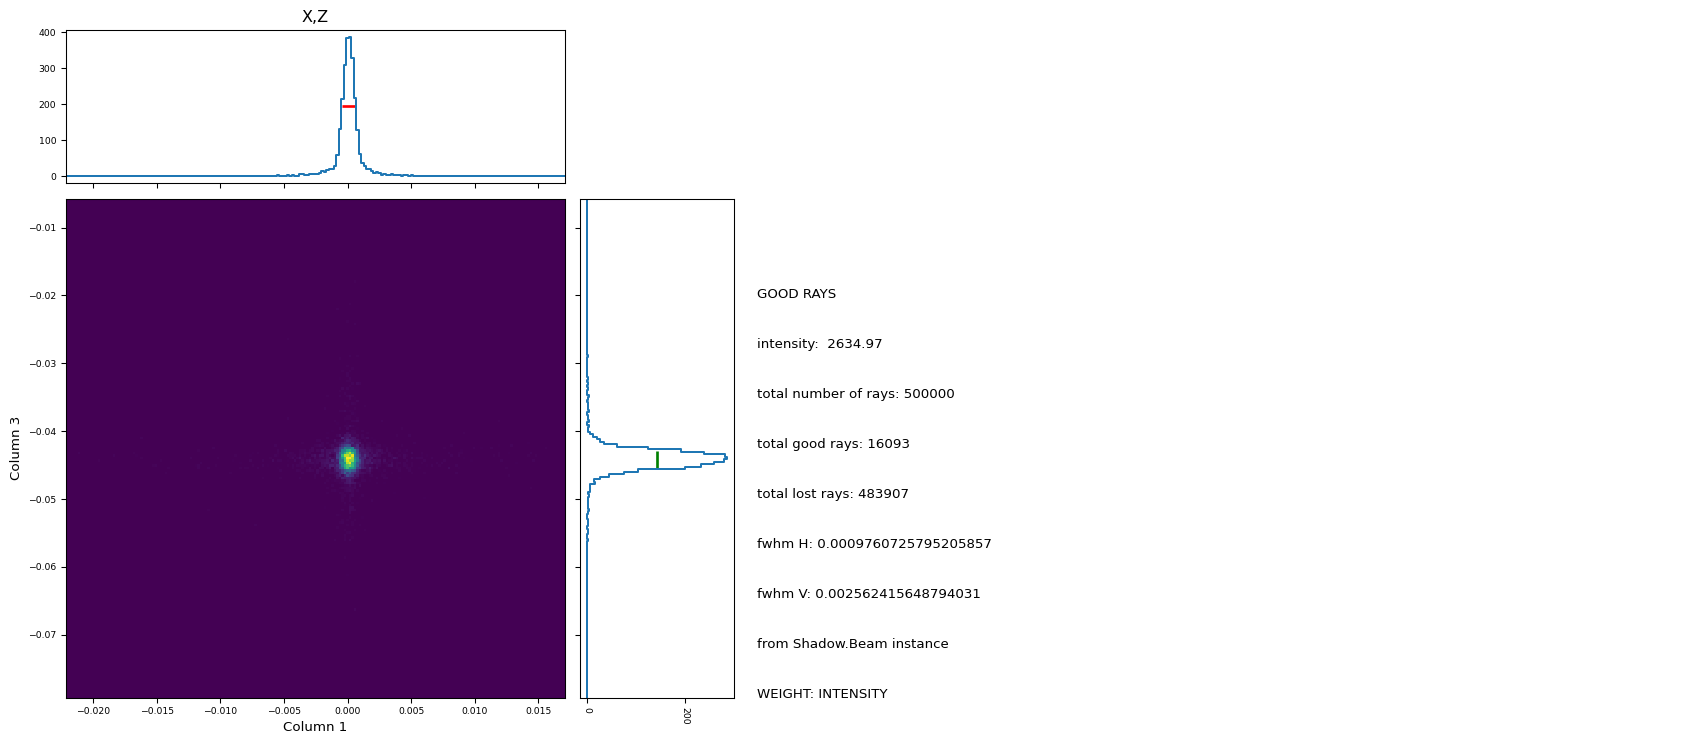

 Call to RESET
 Exit from RESET
 Call to SETSOUR
 Exit from SETSOUR
 Call to IMREF
 Exit from IMREF
 Call to OPTAXIS
 Exit from OPTAXIS
 Call to MSETUP
 Exit from MSETUP
 Call to RESTART
 Exit from RESTART
 Call to MIRROR
 MIRROR: Warning (before calculations): lack of perpendicularity in ray:          604
 MIRROR: Warning (before calculations): lack of perpendicularity in ray:         4993
 MIRROR: Warning (before calculations): lack of perpendicularity in ray:         6068
 MIRROR: Warning (before calculations): lack of perpendicularity in ray:         6781
 MIRROR: Warning (before calculations): lack of perpendicularity in ray:         9301
 MIRROR: Warning (before calculations): lack of perpendicularity in ray:        14312
 MIRROR: Warning (before calculations): lack of perpendicularity in ray:        14380
 MIRROR: Warning (before calculations): lack of perpendicularity in ray:        15188
 Exit from MIRROR
 Call to IMAGE
 Exit from IMAGE
 Call to DEALLOC
 Exit from DEALLOC
 Cal

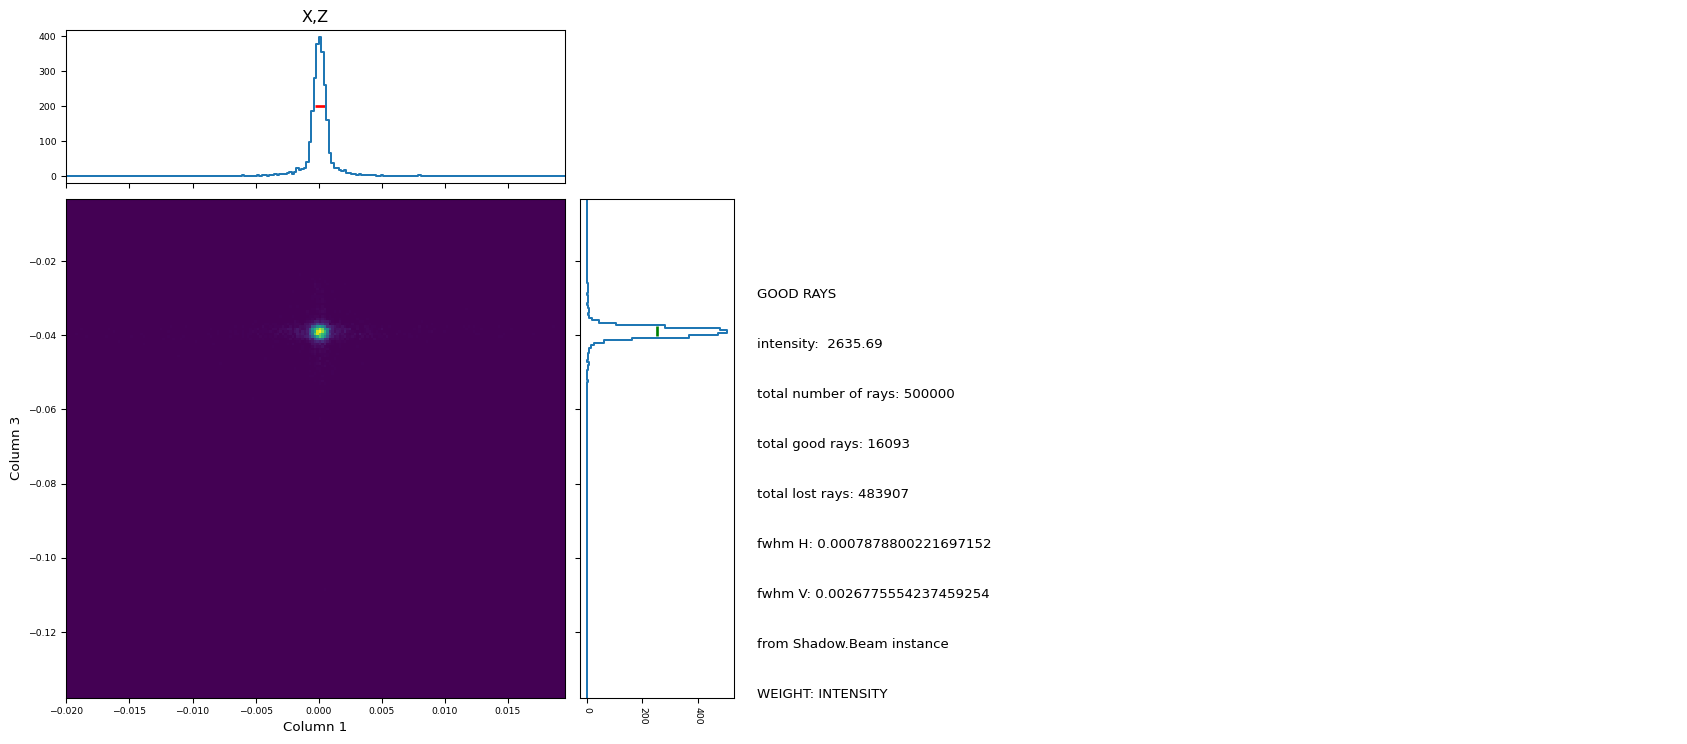

In [7]:
%run run_focusing_system.py

In [4]:
from orangecontrib.shadow.util.shadow_objects import ShadowBeam, ShadowOpticalElement
from orangecontrib.shadow.util.shadow_util import ShadowPhysics

In [5]:
clean_up()

In [6]:
input_beam = load_shadow_beam("primary_optics_system_beam.dat")

In [7]:
# Focusing Optics System -------------------------

focusing_system = FocusingOpticsSystem()

focusing_system.initialize(input_beam=input_beam,
                           rewrite_preprocessor_files=PreProcessorFiles.NO,
                           rewrite_height_error_profile_files=False)

In [8]:
# ----------------------------------------------------------------
# perturbation of the incident beam to make adjustements necessary

focusing_system.perturbate_input_beam(shift_h=0.0, shift_v=0.0)

##### Running the focusing_system.get_beam function results in the jupyter kernel crashing.

In [9]:
# output_beam = focusing_system.get_beam(verbose=False, near_field_calculation=False, debug_mode=False)

##### The code in focusing_system.get_beam looks like this:
```Python
def get_beam(self, verbose=False, **kwargs):
        if self.__input_beam is None: raise ValueError("Focusing Optical System is not initialized")

        try: debug_mode = kwargs["debug_mode"]
        except: debug_mode = False

        try: near_field_calculation = kwargs["near_field_calculation"]
        except: near_field_calculation = False

        run_all = self.__modified_elements == [] or len(self.__modified_elements) == 3

        if run_all or self.__coherence_slits in self.__modified_elements:
            # HYBRID CORRECTION TO CONSIDER DIFFRACTION FROM SLITS
            output_beam = ShadowBeam.traceFromOE(self.__input_beam.duplicate(), self.__coherence_slits.duplicate(), widget_class_name="ScreenSlits")
            output_beam = hybrid_control.hy_run(get_hybrid_input_parameters(output_beam,
                                                                            diffraction_plane=4,  # BOTH 1D+1D (3 is 2D)
                                                                            calcType=1,  # Diffraction by Simple Aperture
                                                                            verbose=verbose)).ff_beam


            if debug_mode: plot_shadow_beam_spatial_distribution(output_beam, title="Coherence Slits", xrange=None, yrange=None)

            self.__slits_beam = output_beam.duplicate()

        if run_all or self.__vkb in self.__modified_elements:
            output_beam = ShadowBeam.traceFromOE(self.__slits_beam.duplicate(), self.__vkb.duplicate(), widget_class_name="EllypticalMirror")

            if not near_field_calculation:
                output_beam = hybrid_control.hy_run(get_hybrid_input_parameters(output_beam,
                                                                                diffraction_plane=2,  # Tangential
                                                                                calcType=3,  # Diffraction by Mirror Size + Errors
                                                                                verbose=verbose)).ff_beam
            else:
                output_beam = hybrid_control.hy_run(get_hybrid_input_parameters(output_beam,
                                                                                diffraction_plane=2,  # Tangential
                                                                                calcType=3,  # Diffraction by Mirror Size + Errors
                                                                                nf=1,
                                                                                focal_length=self.__vkb._oe.SIMAG, # at focus
                                                                                image_distance=self.__vkb._oe.SIMAG, # at focus
                                                                                verbose=verbose)).nf_beam
                output_beam._beam.retrace(self.__vkb._oe.T_IMAGE - self.__vkb._oe.SIMAG)

            if debug_mode: plot_shadow_beam_spatial_distribution(output_beam, title="VKB", xrange=None, yrange=None)

            self.__vkb_beam = output_beam

        if run_all or self.__hkb in self.__modified_elements:
            output_beam = ShadowBeam.traceFromOE(self.__vkb_beam.duplicate(), self.__hkb.duplicate(), widget_class_name="EllypticalMirror")

            if not near_field_calculation:
                output_beam = hybrid_control.hy_run(get_hybrid_input_parameters(output_beam,
                                                                                diffraction_plane=2,  # Tangential
                                                                                calcType=3,  # Diffraction by Mirror Size + Errors
                                                                                verbose=verbose)).ff_beam
            else:
                output_beam = hybrid_control.hy_run(get_hybrid_input_parameters(output_beam,
                                                                                diffraction_plane=2,  # Tangential
                                                                                calcType=3,  # Diffraction by Mirror Size + Errors
                                                                                nf=1,
                                                                                verbose=verbose)).nf_beam

            if debug_mode: plot_shadow_beam_spatial_distribution(output_beam, title="HKB", xrange=None, yrange=None)

            self.__hkb_beam = output_beam

        # after every run, we assume to start again from scratch
        self.__modified_elements = []

        return rotate_axis_system(output_beam, rotation_angle=270.0)
 ```
 
 To try to diagnose where it fails, I am running it step by step below:

In [10]:
output_beam = ShadowBeam.traceFromOE(focusing_system._FocusingOpticsSystem__input_beam.duplicate(),
                                     focusing_system._FocusingOpticsSystem__coherence_slits.duplicate(), widget_class_name="ScreenSlits")

 Call to RESET
 Exit from RESET
 Call to SETSOUR
 Exit from SETSOUR
 Call to IMREF
 Exit from IMREF
 Call to OPTAXIS
 Exit from OPTAXIS
 Call to MSETUP
 Exit from MSETUP
 Call to RESTART
 Exit from RESTART
 Call to MIRROR
 MIRROR1: Warning: Empty element (no mirr.xx file)
 Call to SCREEN
 Exit from SCREEN
 Call to IMAGE
 Exit from IMAGE
 Call to DEALLOC
 Exit from DEALLOC


In [11]:

from orangecontrib.shadow.widgets.special_elements.bl import hybrid_control

In [12]:
output_beam = hybrid_control.hy_run(get_hybrid_input_parameters(output_beam,
                                                                            diffraction_plane=4,  # BOTH 1D+1D (3 is 2D)
                                                                            calcType=1,  # Diffraction by Simple Aperture
                                                                            verbose=False)).ff_beam

 Call to RESET
 Exit from RESET
 Call to SETSOUR
 Exit from SETSOUR
 Call to IMREF
 Exit from IMREF
 Call to OPTAXIS
 Exit from OPTAXIS
 Call to MSETUP
 Exit from MSETUP
 Call to RESTART
 Exit from RESTART
 Call to MIRROR
 MIRROR1: Warning: Empty element (no mirr.xx file)
 Call to SCREEN
 Exit from SCREEN
 Call to SCREEN
 Exit from SCREEN
 Call to IMAGE
 Exit from IMAGE
 Call to DEALLOC
 Exit from DEALLOC


In [13]:
focusing_system._FocusingOpticsSystem__slits_beam = output_beam.duplicate()

In [ ]:
# This is where it crashes the kernel
output_beam = ShadowBeam.traceFromOE(focusing_system._FocusingOpticsSystem__slits_beam.duplicate(), 
                                     focusing_system._FocusingOpticsSystem__vkb.duplicate(), 
                                     widget_class_name="EllypticalMirror")